# House Price Prediction <br>
### Dataset is taken from Kaggle and our feaures are,
- posted_by (who posted this request)
- under_construction (Yes/No Flag)
- RERA certification (Yes/No Flag)
- bhk_no (Number of BHK)
- bhk_or_rk (Flag)
- Square_ft (House's Sqaure ft)
- Ready_to_move (Flag)
- resale (Flag)
- Address (Area & City of the house)
### Our Dependent variable is,
- Target(Price_in_lacs)

### Using Linear Regression models to fit and find which model fits perfectly for our data

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\milan\Desktop\ML\House_price_prediction\train.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
df.shape

(29451, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

## As there is no Nan values, moving to Cleaning part

#### Seperating the address & Longitude & Latitude is not required for our model as we already have address so dropping those two columns

In [6]:
df.columns = df.columns.str.lower()
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [7]:
df.drop(columns = ['longitude','latitude'], inplace = True)
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",60.5


#### Seperating the Address as city and Area

In [8]:
df['area'] = df['address'].apply( lambda x : x.split(',')[0])
df['city'] = df['address'].apply( lambda x : x.split(',')[1])
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,target(price_in_lacs),area,city
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",60.5,New Town,Kolkata


#### Now dropping the address column as we have seperated it as area and city

In [9]:
df.drop(columns = 'address', inplace = True)
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,target(price_in_lacs),area,city
0,Owner,0,0,2,BHK,1300.236407,1,1,55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,60.5,New Town,Kolkata


In [10]:
df.describe()

,under_construction,rera,bhk_no.,square_ft,ready_to_move,resale,target(price_in_lacs)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,30000.000000


- Considering the details of house price vales,  taking price greater than 200 lacs and less than 0.5 lacs as outliers and removing those records from our entry
- Maximum BHK is 20 and all the BHK greater than 5 were considered as outliers and removing those.
- Sqaure feet exceeding 10, 000 also considering as outliers

In [11]:
rows_to_drop = df.loc[(df['target(price_in_lacs)'] > 200) | (df['target(price_in_lacs)'] < 0.5)].index
df.drop(rows_to_drop, inplace = True)
rows_to_drop = df.loc[df['bhk_no.'] > 5].index
df.drop(rows_to_drop, inplace = True)
rows_to_drop = df.loc[df['square_ft'] > 10000].index
df.drop(rows_to_drop, inplace = True)
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,target(price_in_lacs),area,city
0,Owner,0,0,2,BHK,1300.236407,1,1,55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,60.5,New Town,Kolkata


## Analysis

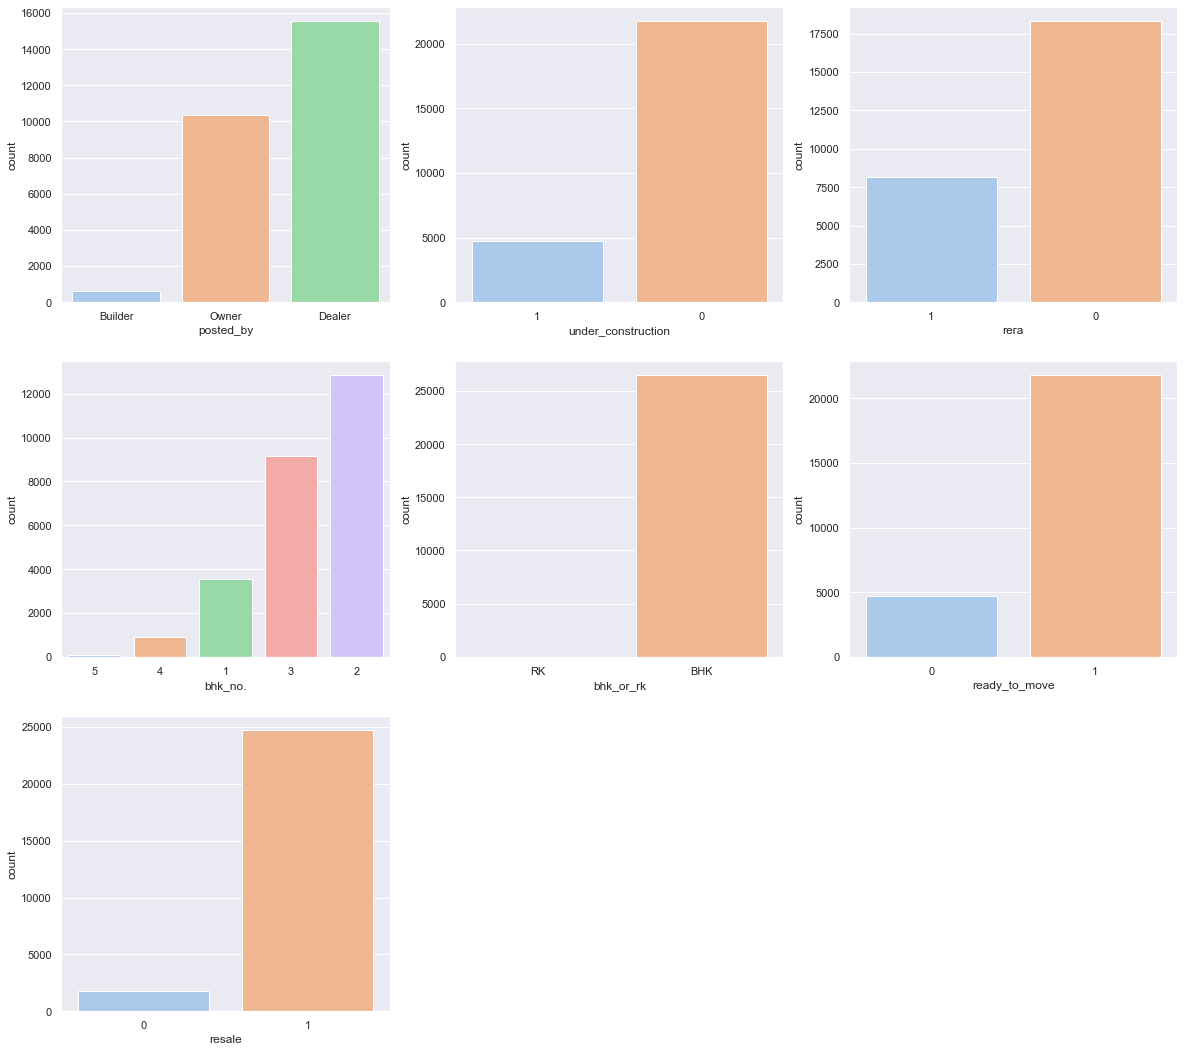

In [12]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(x = df['posted_by'], order = df['posted_by'].value_counts().index[:: -1])

plt.subplot(432)
sns.countplot(x = df['under_construction'], order = df['under_construction'].value_counts().index[:: -1])

plt.subplot(433)
sns.countplot(x = df['rera'], order = df['rera'].value_counts().index[:: -1])

plt.subplot(434)
sns.countplot(x = df['bhk_no.'], order = df['bhk_no.'].value_counts().index[:: -1])

plt.subplot(435)
sns.countplot(x = df['bhk_or_rk'], order = df['bhk_or_rk'].value_counts().index[:: -1])

plt.subplot(436)
sns.countplot(x = df['ready_to_move'], order = df['ready_to_move'].value_counts().index[:: -1])

plt.subplot(437)
sns.countplot(x = df['resale'], order = df['resale'].value_counts().index[:: -1])

plt.show()

In [13]:
df_posted = df.groupby('posted_by').count()
df_posted.head()

,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,target(price_in_lacs),area,city
posted_by,,,,,,,,,,
Builder,599,599,599,599,599,599,599,599,599,599
Dealer,15564,15564,15564,15564,15564,15564,15564,15564,15564,15564
Owner,10332,10332,10332,10332,10332,10332,10332,10332,10332,10332


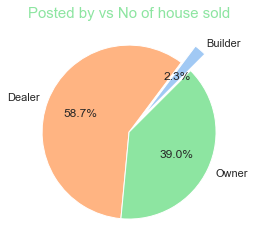

In [14]:
plt.pie(df_posted['rera'], labels = df_posted.index, autopct = '%0.1f%%', explode = [0.25,0,0], startangle = 45)
plt.title('Posted by vs No of house sold', fontsize = 15, color = 'g')

plt.show()

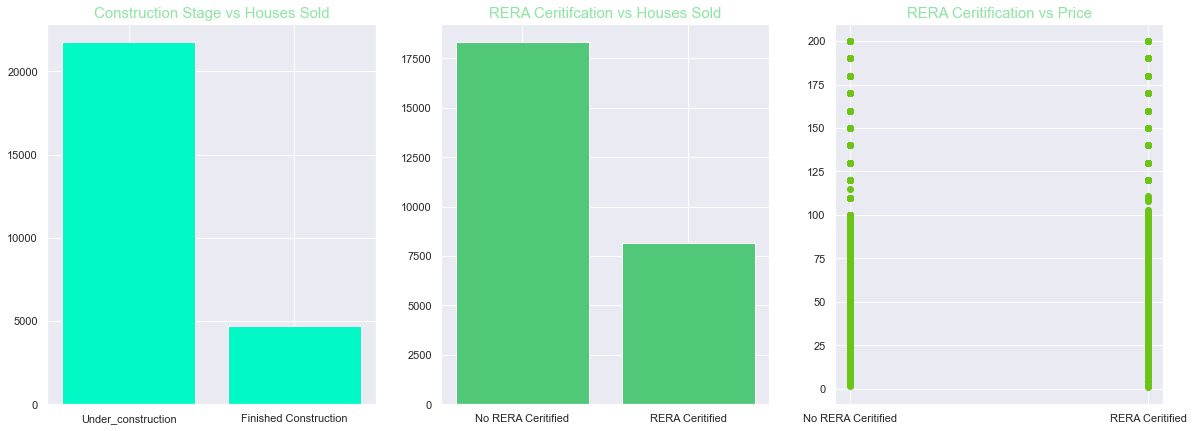

In [15]:
df1 = df.groupby('under_construction').count()
df2 = df.groupby('rera').count()

fig, (ax,ax1, ax2) = plt.subplots(1, 3, figsize = (20,7))

ax.bar(df1.index , height = df1['rera'], color = '#01F9C6')
ax.set_xticks(df1.index , ['Under_construction', 'Finished Construction'])
ax.set_title('Construction Stage vs Houses Sold', fontsize = 15, color = 'g')

ax1.bar(df2.index , height = df2['under_construction'], color = '#50C878')
ax1.set_xticks(df1.index , ['No RERA Ceritified', 'RERA Ceritified'])
ax1.set_title('RERA Ceritifcation vs Houses Sold', fontsize = 15, color = 'g')

ax2.scatter(df['rera'] , df['target(price_in_lacs)'], color = '#6CC417')
ax2.set_title('RERA Ceritification vs Price', fontsize = 15, color = 'g')
ax2.set_xticks([0,1] , ['No RERA Ceritified', 'RERA Ceritified'])

plt.show()

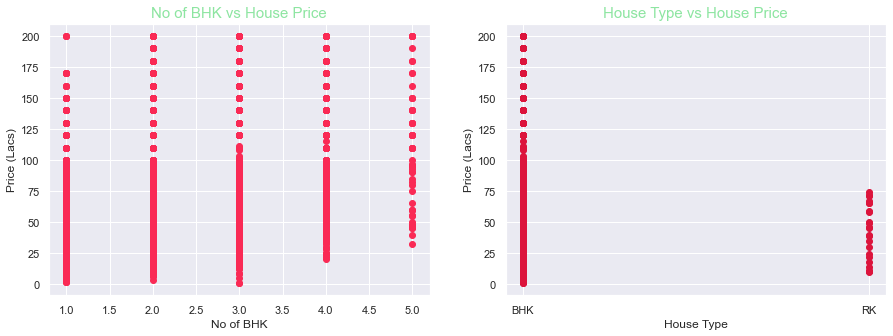

In [16]:
fig, (ax, ax1) = plt.subplots(1,2, figsize = (15,5))

ax.scatter(df['bhk_no.'], df['target(price_in_lacs)'], color = '#FA2A55')
ax.set_title('No of BHK vs House Price', color = 'g', fontsize = 15)
ax.set_xlabel('No of BHK')
ax.set_ylabel('Price (Lacs)')

ax1.scatter(df['bhk_or_rk'], df['target(price_in_lacs)'],  color = '#DC143C')
ax1.set_title('House Type vs House Price', color = 'g', fontsize = 15)
ax1.set_xlabel('House Type')
ax1.set_ylabel('Price (Lacs)')

plt.show()

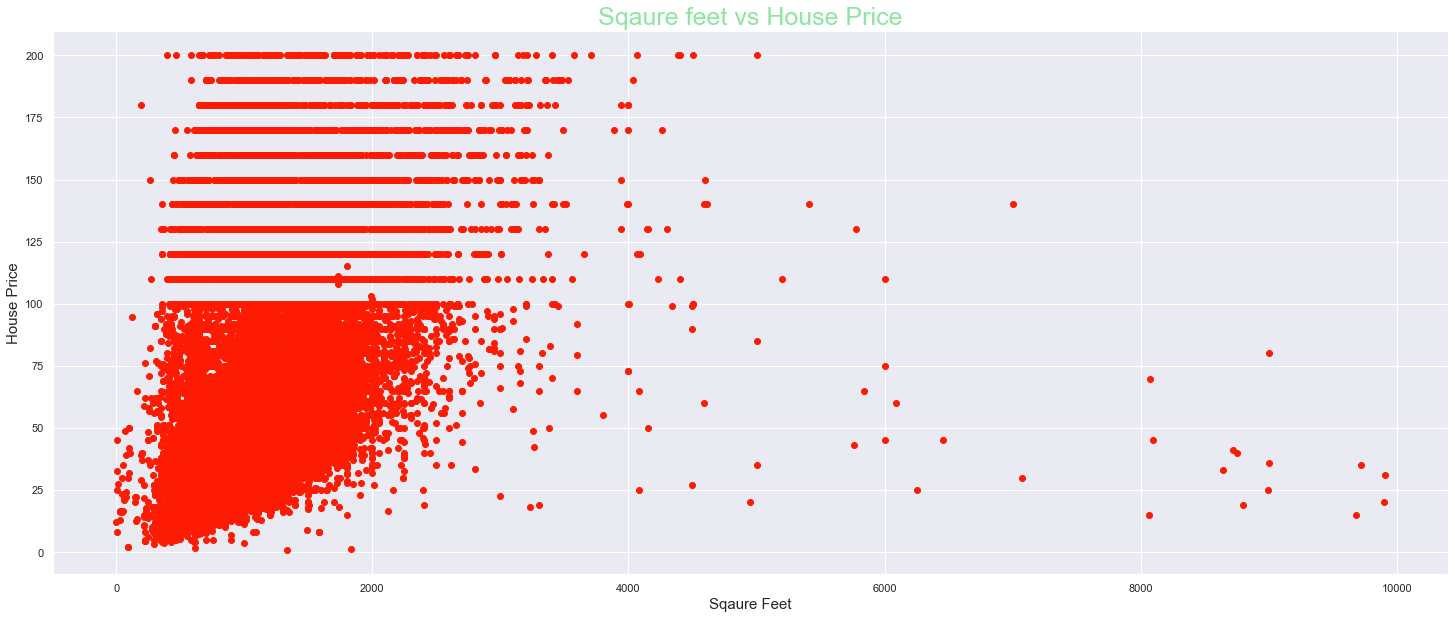

In [17]:
plt.figure(figsize = (25,10))

sns.set_style('darkgrid')
plt.scatter( df['square_ft'], df['target(price_in_lacs)'], color = '#FD1C03')
plt.title('Sqaure feet vs House Price', color = 'g', fontsize = 25)
plt.xlabel('Sqaure Feet', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)

plt.show()

In [18]:
df_resale = df.groupby('resale')['target(price_in_lacs)'].mean().reset_index()
df_move = df.groupby('ready_to_move')['target(price_in_lacs)'].mean().reset_index()

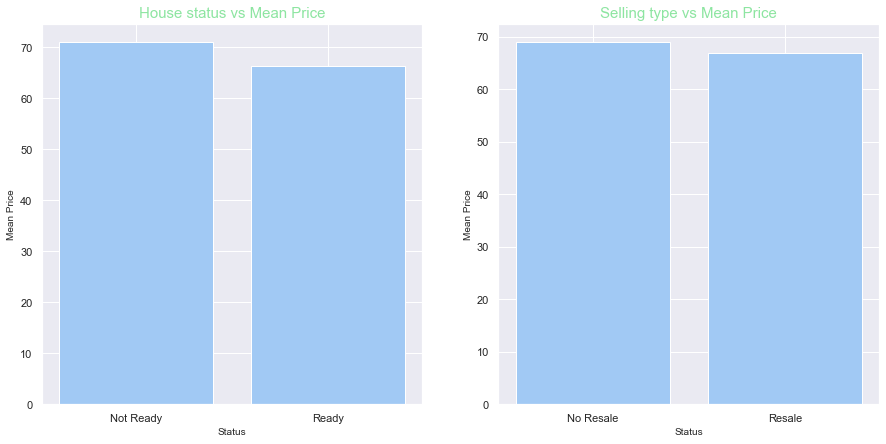

In [19]:
plt.figure(figsize = (15,7))

plt.subplot(121)
plt.bar(df_move['ready_to_move'], height = df_move['target(price_in_lacs)'])
plt.xticks(df_move['ready_to_move'], ['Not Ready', 'Ready'])
plt.title('House status vs Mean Price',color = 'g', fontsize = 15)
plt.xlabel('Status', fontsize = 10)
plt.ylabel('Mean Price', fontsize = 10)

plt.subplot(122)
plt.bar(df_resale['resale'], height = df_resale['target(price_in_lacs)'])
plt.xticks(df_resale['resale'], ['No Resale', 'Resale'])
plt.title('Selling type vs Mean Price',color = 'g', fontsize = 15)
plt.xlabel('Status', fontsize = 10)
plt.ylabel('Mean Price', fontsize = 10)

plt.show()

### From the above analysis
- Most houses were sold by Dealers.
- Under Construction houses are sold much than Finished ones.
- Most sold house without RERA certification even though RERA certification does not play in price.
- Most people preferring 3 BHK houses than RK houses.
- From 1000 - 2000 Sq ft houses are preferred

## Preprocessing

#### Using Label Encoder to enocde posted_by, bhk_or_rk, area, city columns

In [20]:
posted_encoder = LabelEncoder()
bhk_encoder = LabelEncoder()
city_encoder = LabelEncoder()
area_encoder = LabelEncoder()

In [21]:
df['posted_by'] = posted_encoder.fit_transform(df['posted_by'])
df['bhk_or_rk'] = bhk_encoder.fit_transform(df['bhk_or_rk'])
df['city']  = city_encoder.fit_transform(df['city'])
df['area'] = area_encoder.fit_transform(df['area'])

In [22]:
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,target(price_in_lacs),area,city
0,2,0,0,2,0,1300.236407,1,1,55.0,2302,164
1,1,0,0,2,0,1275.000000,1,1,51.0,5357,309
2,2,0,0,2,0,933.159722,1,1,43.0,1842,164
3,2,0,1,2,0,929.921143,1,1,62.5,4149,223
4,1,1,0,2,0,999.009247,0,1,60.5,3125,281


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26495 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posted_by              26495 non-null  int32  
 1   under_construction     26495 non-null  int64  
 2   rera                   26495 non-null  int64  
 3   bhk_no.                26495 non-null  int64  
 4   bhk_or_rk              26495 non-null  int32  
 5   square_ft              26495 non-null  float64
 6   ready_to_move          26495 non-null  int64  
 7   resale                 26495 non-null  int64  
 8   target(price_in_lacs)  26495 non-null  float64
 9   area                   26495 non-null  int32  
 10  city                   26495 non-null  int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 2.0 MB


In [24]:
y = df['target(price_in_lacs)'].values
df.drop(columns = 'target(price_in_lacs)' , inplace = True)
x = df.iloc[:, :].values

## Model Selection

In [25]:
linear = LinearRegression()
lasso = Lasso()
linear_svr = SVR(kernel = 'linear')
rbf_svr = SVR(kernel = 'rbf')
tree = DecisionTreeRegressor()
forest = RandomForestRegressor(n_estimators = 20)

In [26]:
linear.fit(x, y)

LinearRegression()

In [27]:
lasso.fit(x,y)

Lasso()

In [28]:
rbf_svr.fit(x,y)

SVR()

In [29]:
tree.fit(x,y)

DecisionTreeRegressor()

In [30]:
forest.fit(x,y)

RandomForestRegressor(n_estimators=20)

In [31]:
models = [linear,lasso,rbf_svr,tree,forest]
scores = []
for i in models:
    scores.append(np.average(cross_val_score(i,x,y)))
print(scores)

[0.27006179283111953, 0.2605734489355252, 0.16019454929192586, 0.5825592656825388, 0.7551568495237115]


### from the above scores & cross validation score Random Forest is giving higher scores than others, so taking that model as Final one.

### Testing our data given

In [32]:
test = pd.read_csv(r'C:\Users\milan\Desktop\ML\House_price_prediction\test.csv')
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [33]:
test.shape

(68720, 11)

In [34]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [35]:
#Cleaning our test dataframe
test.drop(columns = ['LONGITUDE','LATITUDE'], inplace = True)
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat"
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur"
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata"
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur"
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad"


In [36]:
test.columns = test.columns.str.lower()
test.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat"
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur"
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata"
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur"
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad"


In [37]:
test['area'] = test['address'].apply( lambda x : x.split(',')[0])
test['city'] = test['address'].apply( lambda x : x.split(',')[1])
test.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,area,city
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",Kamrej,Surat
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",Panvel,Lalitpur
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",New Town,Kolkata
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",Kalwar Road,Jaipur
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",Mai Mandir,Nadiad


In [38]:
test.drop(columns = 'address', inplace = True)
test.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,area,city
0,Owner,0,0,1,BHK,545.171340,1,1,Kamrej,Surat
1,Dealer,1,1,2,BHK,800.000000,0,0,Panvel,Lalitpur
2,Dealer,0,0,2,BHK,1257.096513,1,1,New Town,Kolkata
3,Dealer,0,0,3,BHK,1400.329489,1,1,Kalwar Road,Jaipur
4,Owner,0,0,1,BHK,430.477830,1,1,Mai Mandir,Nadiad


In [39]:
#encoding the test data
test['posted_by'] = posted_encoder.fit_transform(test['posted_by'])
test['bhk_or_rk'] = bhk_encoder.fit_transform(test['bhk_or_rk'])
test['city']  = city_encoder.fit_transform(test['city'])
test['area'] = area_encoder.fit_transform(test['area'])
test.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,area,city
0,2,0,0,1,0,545.171340,1,1,3308,667
1,1,1,1,2,0,800.000000,0,0,5495,535
2,1,0,0,2,0,1257.096513,1,1,5149,524
3,1,0,0,3,0,1400.329489,1,1,3262,483
4,2,0,0,1,0,430.477830,1,1,4212,567


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   posted_by           68720 non-null  int32  
 1   under_construction  68720 non-null  int64  
 2   rera                68720 non-null  int64  
 3   bhk_no.             68720 non-null  int64  
 4   bhk_or_rk           68720 non-null  int32  
 5   square_ft           68720 non-null  float64
 6   ready_to_move       68720 non-null  int64  
 7   resale              68720 non-null  int64  
 8   area                68720 non-null  int32  
 9   city                68720 non-null  int32  
dtypes: float64(1), int32(4), int64(5)
memory usage: 4.2 MB


In [41]:
x_test = test.iloc[: , :].values

In [42]:
pred = forest.predict(x_test)

In [43]:
test['predicted_price(lacs)'] = pred

In [44]:
test.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,area,city,predicted_price(lacs)
0,2,0,0,1,0,545.171340,1,1,3308,667,26.650
1,1,1,1,2,0,800.000000,0,0,5495,535,40.345
2,1,0,0,2,0,1257.096513,1,1,5149,524,92.630
3,1,0,0,3,0,1400.329489,1,1,3262,483,92.625
4,2,0,0,1,0,430.477830,1,1,4212,567,17.055
